In [15]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [16]:
#generate 5 graphs each with 10 nodes
G1 = nx.gnp_random_graph(10, 0.5)
G2 = nx.gnp_random_graph(10, 0.6)
G3 = nx.gnp_random_graph(10, 0.7)
G4 = nx.gnp_random_graph(10, 0.8)
G5 = nx.gnp_random_graph(10, 0.9)

In [17]:
#nx.draw(G1, with_labels=True)
#nx.draw(G2, with_labels=True)

In [18]:
#union together 5 sub graphs
G = nx.union(G1,G2, rename=('0-','1-'))
G = nx.union(G, G3, rename=('0-', '1-'))
G = nx.union(G, G4, rename=('0-', '1-'))
G = nx.union(G, G5, rename=('0-', '1-'))

In [19]:
#nx.draw(G, with_labels = False)

In [20]:
#connect connected compnents together using 1 edge between each component
connected_comp  = nx.connected_components(G)
num_cc = nx.number_connected_components(G)
def connect_subgraphs():
    node = -1;
    for cc in connected_comp:
        if node == -1 :
            node = cc.pop()
            cc.add(node)
        else:
            node2= cc.pop()
            node3= cc.pop()
            G.add_edge(node, node2)
            G.add_edge(node, node3)
            node = node3
            cc.add(node2)
            cc.add(node3)
            

connect_subgraphs()

In [21]:
#nx.draw(G, with_labels = False)

In [22]:
#assign random edge weight to the graph
for u in list(G.nodes()):
    for v in list(G.nodes()):
        if (G.has_edge(u,v)):
            edge_weight = round(np.random.uniform(1,100),3)
            G[u][v]['weight'] = edge_weight

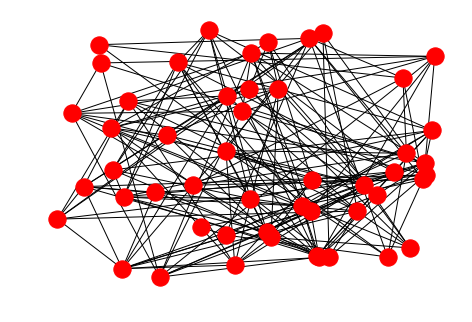

In [23]:
nx.draw_random(G)

In [24]:
#find the minimum spanning tree
T = nx.minimum_spanning_tree(G)

In [25]:
#change mst leaf edges to smaller weight
for u in list(T.nodes()):
    neighbor_nodes = list(nx.neighbors(T, u))
    if len(neighbor_nodes) == 1:
        v = neighbor_nodes[0]
        edge_weight = round(np.random.uniform(1,10),3)
        G[u][v]['weight'] = edge_weight

In [26]:
#relabel nodes to integer from 0 to V-1
G = nx.relabel.convert_node_labels_to_integers(G, first_label = 0)

In [27]:
#print out to .in input file (remember to change file name)  also 50-edges.in is a helper file
def append_num_nodes():
    
    nx.write_weighted_edgelist(G, '50-edges.in')
    
    input_file = "50.in"
    f = open("50.in", "w+")
    
    num_nodes = G.number_of_nodes()
    f.write(str(num_nodes))
    f.write('\n')

    g = open("50-edges.in", "r")
    gl = g.readlines()
    for line in gl:
        f.write(line)
    
    f.close()
    g.close()
    
    
append_num_nodes()